In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

In [4]:
# satisfaction vs number of issues by model
X = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Y = np.array([(73, 500), (76, 1250), (74, 970), (78, 1010),
              (84, 700), (77.5, 950), (75, 800)])

Text(47.7, -830, '모델별 $\\bf{이슈}$ vs. $\\bf{만족도}$')

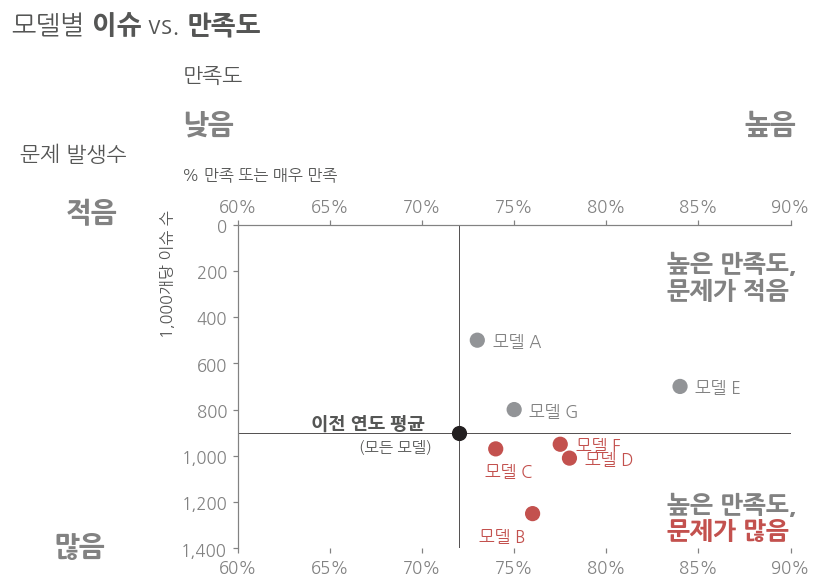

In [18]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(8.2, 5.4), # 너비, 높이 (인치)
                        dpi=110)             # 그림 해상도

# 그림의 여백을 설정하여 서브플롯 레이아웃 조정
fig.subplots_adjust(left=0.262, right=0.875, top=0.605, bottom=0.06)

# 색상이 있는 산점도 그리기
colors = [GRAY7, RED1, RED1, RED1, GRAY7, RED1, GRAY7]
ax1.scatter(Y[:, 0], Y[:, 1], color=colors, s=80)

# 오프셋이 있는 색상 레이블과 함께 주석 달기
txt_colors = [GRAY6, RED1, RED1, RED1, GRAY6, RED1, GRAY6]
offsets = [(10, -4), (-35, -18), (-7, -18), (10, -4), 
           (10, -4), (10, -4), (10, -4)]
for i, n in enumerate(X):
    ax1.annotate('모델 ' + n,               # 주석에 사용될 모델 X 텍스트
                 Y[i],                       # 주석을 달 위치 (x,y)
                 xytext=offsets[i],          # 텍스트를 배치할 위치 (x,y)
                 textcoords='offset points', # 오프셋 (포인트 단위)
                 color=txt_colors[i],
                 fontsize=11)

# 이전 년도 평균 지점 그리기
ax1.scatter([72], [900], color=GRAY1, s=80)
# 이전 년도 평균 수직 및 수평 선 그리기
plt.axvline(x=72, color=GRAY1, linewidth=0.5)
plt.axhline(y=900, color=GRAY1, linewidth=0.5)
# 이전 년도 평균 지점 주석 달기
ax1.text(64, 880, '이전 연도 평균', color=GRAY3, fontsize=12, 
         fontweight='bold')
ax1.text(66.6, 980, '(모든 모델)', color=GRAY3, fontsize=10)

# y축과 x축에 대한 데이터 제한 설정
ax1.set_xlim([60, 90])
ax1.set_ylim([0, 1400])

# y축 반전
ax1.invert_yaxis()

# 축 객체의 속성 설정
xticks = list(range(60, 95, 5))    # x 축 눈금 계산
yticks = list(range(0, 1600, 200)) # y 축 눈금 계산
plt.setp(ax1,
         xticks=xticks,                            # x 축 눈금 설정
         xticklabels=[str(i)+'%' for i in xticks], # n% 라벨 포함
         yticks=yticks)

# 눈금, 눈금 라벨, 그리드 선의 모양 변경
ax1.tick_params(top='on', bottom='off', labelbottom='off', labeltop='on')

# 주요 눈금의 형식 설정 (쉼표로 천 단위 분할)
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 차트 테두리 제거
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# x, y 눈금 라벨 모양 변경
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(11)
    i.set_color(GRAY6)

# 눈금과 테두리 색상 변경
ax1.tick_params(color=GRAY6)
ax1.spines['top'].set_color(GRAY6)
ax1.spines['left'].set_color(GRAY6)

# 축 라벨 추가
ax1.text(55.8, 475, '1,000개당 이슈 수', color=GRAY3, 
         rotation='vertical',  fontsize=10.5)
ax1.text(57, -200, '% 만족 또는 매우 만족', color=GRAY3, 
         fontsize=10.5)

kw = {'fontweight': 'bold'}
# 추가 정보 텍스트 추가
ax1.text(83.3, 195, '높은 만족도,', fontsize='16', color=GRAY6, **kw) 
ax1.text(83.3, 315, '문제가 적음', fontsize='16', color=GRAY6, **kw)
ax1.text(83.3, 1240, '높은 만족도,', fontsize='16', color=GRAY6, **kw)
ax1.text(83.3, 1350, '문제가 많음', fontsize='16', color=RED1, **kw)
ax1.text(50.7, -20, '적음', fontsize='18', color=GRAY6, **kw)
ax1.text(87.5, -400, '높음', fontsize='18', color=GRAY6, **kw)
ax1.text(57, -400, '낮음', fontsize='18', color=GRAY6, **kw)
ax1.text(50, 1425, '많음', fontsize='18', color=GRAY6, **kw)
ax1.text(54, -280, '문제 발생수', color=GRAY3, fontsize=14, 
         horizontalalignment='right', linespacing=1.6)
ax1.text(57, -620, '만족도', color=GRAY3, fontsize=14)

# 플롯에 제목 추가
ax1.text(47.7, -830, '모델별 $\\bf{이슈}$ vs. $\\bf{만족도}$', color=GRAY3, fontsize=17)
